In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import datasets
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

def load_data(binary_labels=False):
    X = pd.read_csv("image_data.csv", header=None).to_numpy()
    y = pd.read_csv("image_labels.csv", header=None).to_numpy().reshape(-1,)
    
    X = X[:,:5]
    
    if binary_labels:
        y = (y == 0).astype(int)
        
    return X, y


# Load the data
X, y = load_data()

# Print information of dataset
print(f"Shape of feature matrix: {X.shape} \nShape of label vector: {y.shape}")
print(f"Number of samples from Class 0: {sum(y == 0)}")
print(f"Number of samples from Class 1: {sum(y == 1)}")
print(f"Number of samples from Class 2: {sum(y == 2)}")

Shape of feature matrix: (178, 5) 
Shape of label vector: (178,)
Number of samples from Class 0: 59
Number of samples from Class 1: 71
Number of samples from Class 2: 48


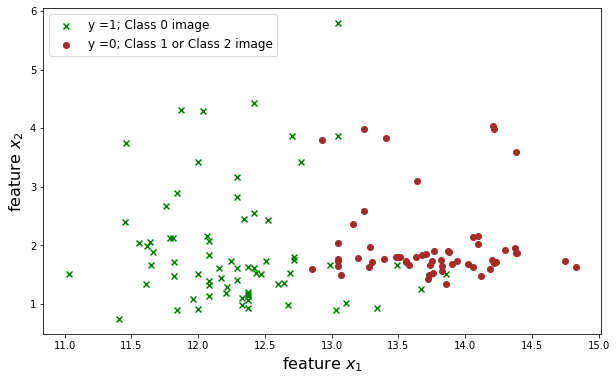

In [2]:
idx_1 = np.where(y == 1) # Indices of class 0 images
idx_2 = np.where(y == 0) # Indices of not class 0 images

# Plot scatterplot of dataset with different markings for class 0 images
fig, axes = plt.subplots(figsize=(10, 6))
axes.scatter(X[idx_1, 0], X[idx_1, 1], c='green', marker ='x', label='y =1; Class 0 image')
axes.scatter(X[idx_2, 0], X[idx_2, 1], c='brown', marker ='o', label='y =0; Class 1 or Class 2 image')

# Set axis labels and legend
axes.legend(loc='upper left', fontsize=12)
axes.set_xlabel('feature $x_1$', fontsize=16)
axes.set_ylabel('feature $x_2$', fontsize=16)
plt.show()

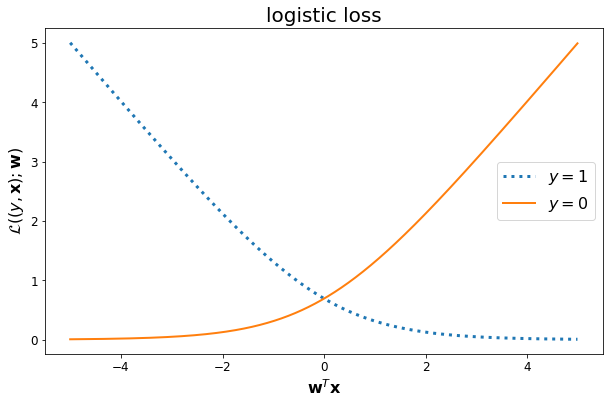

In [4]:
# Define sigmoid function according to formula (5)
def sigmoid_func(x):
    return 1/(1 + np.exp(-x))

# Choose values (w^T*x) for calculating loss 
range_x = np.arange(-5 , 5 , 0.01)

# Calculate logistic loss for y=1 and y=0
logloss_y1 = -np.log(sigmoid_func(range_x))
logloss_y0 = -np.log(1-sigmoid_func(range_x))

# Set fontsizes for matplotlib
plt.rc('legend', fontsize=16) 
plt.rc('axes', labelsize=16) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
     
# Plot the results, using the plot function in matplotlib.pyplot.
fig, axes = plt.subplots(1, 1, figsize=(10, 6)) 
axes.plot(range_x, logloss_y1, linestyle=':', label=r'$y=1$', linewidth=3.0)
axes.plot(range_x, logloss_y0, label=r'$y=0$', linewidth=2.0)

# Set axis labels and title
axes.set_xlabel(r'$\mathbf{w}^{T}\mathbf{x}$')
axes.set_ylabel(r'$\mathcal{L}((y,\mathbf{x});\mathbf{w})$')
axes.set_title("logistic loss", fontsize=20)
axes.legend()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Set random seed for reproducibility
np.random.seed(0)

# Load the features and labels
X, y = load_data(binary_labels=True)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)

### BEGIN STUDENT TASK ###
scaler1= StandardScaler()
log_reg1= LogisticRegression(C=1e6)
pipe1= Pipeline([('scaler1', scaler1), ('log_reg1', log_reg1)])

pipe1.fit(X_train, y_train)

err_train = pipe1.score(X_train, y_train)
err_val = pipe1.score(X_val, y_val)


# Print training and validation errors
print(f"Training error: {err_train}")
print(f"Validation error: {err_val}")

# Perform some sanity checks on the results
assert err_train > 0.95, "Training error is too low!"
assert err_val < 0.89, "Validation error is too high!"
print('Sanity check tests passed!')

Training error: 0.9577464788732394
Validation error: 0.8888888888888888
Sanity check tests passed!


Labels: {0, 1, 2}
Predicted probability of each label for first data point: [0.91585133 0.00181382 0.08233485]
Predicted label for first data point: 0
True label for first data point: 0
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ..............................log_reg__C=0.0001; total time=   0.0s
[CV 2/5] END ..............................log_reg__C=0.0001; total time=   0.0s
[CV 3/5] END ..............................log_reg__C=0.0001; total time=   0.0s
[CV 4/5] END ..............................log_reg__C=0.0001; total time=   0.0s
[CV 5/5] END ..............................log_reg__C=0.0001; total time=   0.0s
[CV 1/5] END ...............................log_reg__C=0.001; total time=   0.0s
[CV 2/5] END ...............................log_reg__C=0.001; total time=   0.0s
[CV 3/5] END ...............................log_reg__C=0.001; total time=   0.0s
[CV 4/5] END ...............................log_reg__C=0.001; total time=   0.0s
[CV 5/5] END ............

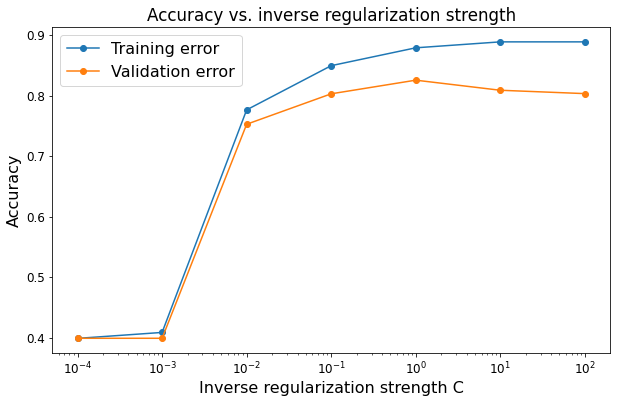

In [46]:
# Set random seed for reproducibility
np.random.seed(0)

# Load features and labels with all labels
X, y = load_data()

# Fit logistic regression model
scaler = StandardScaler()
log_reg = LogisticRegression(multi_class='ovr')
pipe = Pipeline([('scaler', scaler), ('log_reg', log_reg)])
pipe.fit(X, y)

# Predict labels and probabilities
y_pred = pipe.predict(X)
pred_probabilities = pipe.predict_proba(X)

print(f"Labels: {set(y_pred)}")
print(f"Predicted probability of each label for first data point: {pred_probabilities[0]}")
print(f"Predicted label for first data point: {y_pred[0]}")
print(f"True label for first data point: {y[0]}")




from sklearn.model_selection import GridSearchCV

# Set random seed for reproducibility
np.random.seed(0)

# Candidates for the inverse regularization strength
C_candidates = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

### STUDENT TASK ###

scaler = StandardScaler()
log_reg = LogisticRegression(multi_class='ovr')
pipe = Pipeline([('scaler', scaler), ('log_reg', log_reg)])

param_grid = {
    'log_reg__C': C_candidates
}
    
slrgs = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=3)                
slrgs.fit(X, y)

err_train = slrgs.cv_results_['mean_train_score']
err_val = slrgs.cv_results_['mean_test_score']
best_model = slrgs.best_estimator_

# YOUR CODE HERE


# Print training and validation errors
print(f"Training error: {err_train}")
print(f"Validation error: {err_val}")
print(f"Best model: {best_model}")

# Perform some sanity checks on the results
assert len(err_train) == len(C_candidates), "err_train is of the wrong size!"
assert len(err_val) == len(C_candidates), "err_val is of the wrong size!"
assert best_model.get_params()['log_reg__C'] == 1, "The optimal parameter value is wrong!"
print('Sanity check tests passed!')

# Plot training and validation errors for the different values of C
plt.figure(figsize=(10,6))
plt.plot(C_candidates, err_train, '-o', label='Training error')
plt.plot(C_candidates, err_val, '-o',label='Validation error')

plt.xscale('log')
plt.title("Accuracy vs. inverse regularization strength")
plt.xlabel('Inverse regularization strength C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

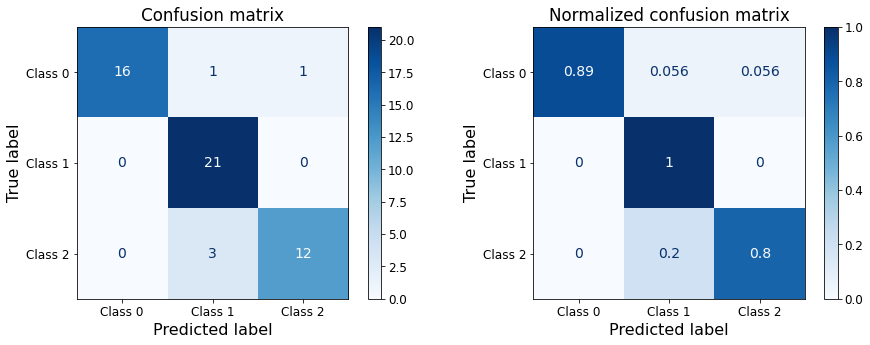

In [43]:
from sklearn.metrics import plot_confusion_matrix

# Set random seed for reproducibility
np.random.seed(0)

# Create training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=0)

# Create model using the best inverse regularization strength (C=1)
scaler = StandardScaler()
log_reg = LogisticRegression(C=1)
pipe = Pipeline([('scaler', scaler), ('log_reg', log_reg)])

# Fit model on training set
pipe.fit(X_train, y_train)

# Define class labels for confusion matrices
classes = ['Class 0','Class 1','Class 2']

# Define plotting options (title, normalization, axes index)
options = [("Confusion matrix", None, 0),
           ("Normalized confusion matrix", 'true', 1)]

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Create subplots (1 row, 2 columns)
plt.rc('font', size=14)  # Set fontsize
for title, normalize, ax_idx in options:
    # main parameters of function `plot_confusion_matrix` are:
    # trained classifier (log_reg), data (X, y)
    disp = plot_confusion_matrix(pipe, X_val, y_val,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=axes[ax_idx])
    disp.ax_.set_title(title)

plt.show()


Accuracy: 100.0%


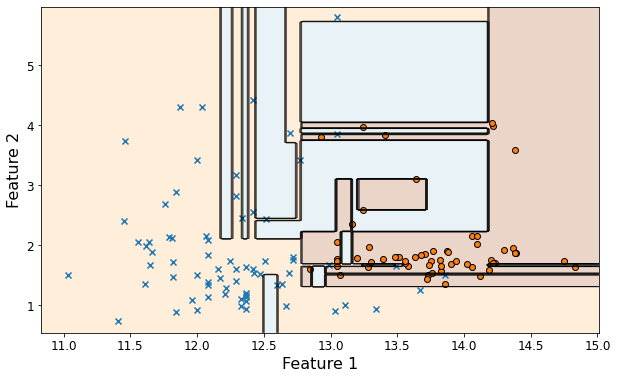

In [47]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    """Function with which to plot decision boundary"""
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    x = np.arange(x_min, x_max, h)
    y = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(x, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    idx_1 = np.where(Y == 1)[0] # index of each class 0 iamge.
    idx_2 = np.where(Y == 0)[0] # index of each not class 0 image
    
    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    plt.scatter(X[idx_1, 0], X[idx_1, 1], marker='x', label='class 0', edgecolors='k')
    plt.scatter(X[idx_2, 0], X[idx_2, 1], marker='o', label='class 1', edgecolors='k')
    plt.xlabel(r'Feature 1')
    plt.ylabel(r'Feature 2')
    
   # Set random seed
np.random.seed(0)

# Load data and select only the first two features
X, y = load_data()
X = X[:,:2]

clf = DecisionTreeClassifier(criterion='entropy')   # define object "clf" which represents a decision tree
clf.fit(X, y)                    # learn a decision tree that fits well the labeled images  
y_pred = clf.predict(X)          # compute the predicted labels for the images

# Calculate the accuracy score of the predictions
accuracy = clf.score(X, y)
print(f"Accuracy: {round(100*accuracy, 2)}%")

# Plot decision boundary
plot_decision_boundary(clf, X, y)
plt.show() 

Training error: 1.0
Validation error: 0.7777777777777778
Sanity check tests passed!


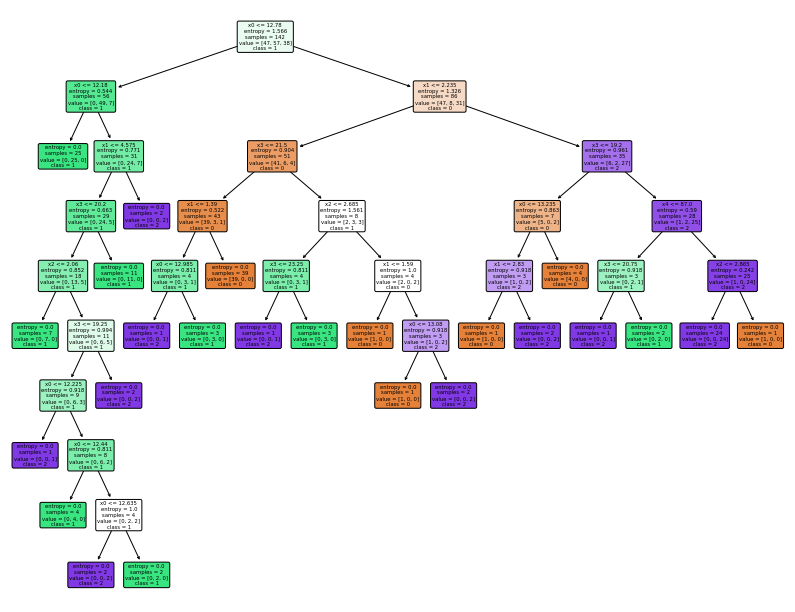

In [53]:
# Set random seed
np.random.seed(0)

# Load data to feature matrix X and label vector y 
X, y = load_data()

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)

### STUDENT TASK ###
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

err_train = clf.score(X_train, y_train)
err_val = clf.score(X_val, y_val)


# Print training and validation error
print(f"Training error: {err_train}")
print(f"Validation error: {err_val}")

# Perform some sanity checks on the outputs
assert X.shape == (178, 5), "Training set label matrix has wrong dimensions."
assert y.shape == (178,), "label vector has wrong dimensions."
assert y_pred.shape == (178,), "Prediction vector has wrong dimensions."
print('Sanity check tests passed!')

from sklearn.tree import plot_tree

feature_cols = ["x" + str(i) for i in range(len(X[0,:]))] # needed for visualization
label_names = ['0', '1', '2']

# Visualize the decision tree
plt.figure(figsize=(14,11))
plot_tree(clf, filled=True, rounded=True, feature_names=feature_cols, class_names=label_names)
plt.show()
